### <div align="center">**DNA and random walk for accessible volume calculation** </div>
##### <div align="center">*Markus Solgård, Christoffer Waldemar, and Audun Steinkopf*</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import point_in_spheres
import Point_Maker
import Random_Spheres
import Plot_Sphere
import Volume_Of_Spheres
import calculate_pi
import Size_of_atom
import Random_walker
import Plot_dna
import Calculate_sphere
import Calculate_the_volume_of_DNA


# **Topic 1**


## *Task 0*
We use the plot function to define the box in which we will place our spheres and points

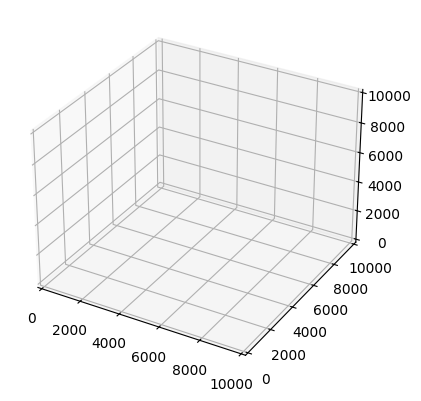

In [2]:
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

plt.show()

# Task 1 
We created a random point, and placed it inside the box

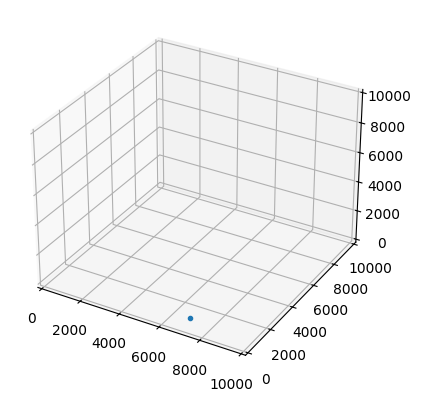

In [3]:
#Function in PointMaker make_points, makes a random point, and then places it
points = 1
point = Point_Maker.make_points(points,0,10000)#Point randomly placed in simulation box
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

ax.plot(point[:,0],point[:,1],point[:,2],'.')
plt.show()


# Task 2
In this task we made a function to randomize the size and location of a sphere within the box

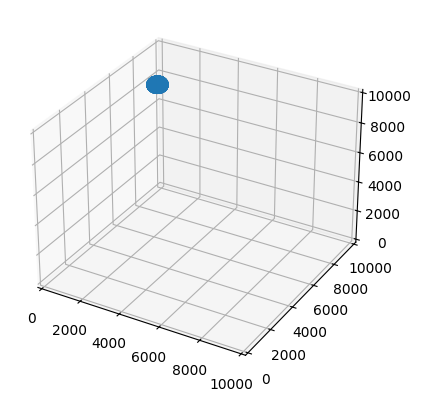

In [4]:
# Generate a random sphere and plot it in 3D
sphere = Random_Spheres.rand_tall_med_r(1, 0, 10000, 5)
x, y, z = Plot_Sphere.plot_sphere(sphere)

x = np.squeeze(x).ravel()
y = np.squeeze(y).ravel()
z = np.squeeze(z).ravel()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.set_xlim(0, 10000)
ax.set_ylim(0, 10000)
ax.set_zlim(0, 10000)

ax.scatter(x, y, z, s=1, marker='.')

plt.show()

# Task 3
This function checks if the generated point in task 2 is inside a sphere. It is the special case of the function in task 4 where we are only working with a single point, hence if the sphere is inside 1 will be printed, if the point is outside 0 will be printed.

In [5]:
x_point,y_point,z_point, point_in = point_in_spheres.point_in_spheres(sphere,point)
print(point_in/points)

0.0


# Task 4
In this task we will calculate and plot the fraction of points inside the sphere divided by the number of randomly
generated points. if the number is large enough, the share of points randomly placed inside the spheres divided by the total number of points should approximate the same volume % as the volume of the spheres divided by the volume of the box. Because we know the volume of the box and the volume of the spheres we can just use that to see if our monte-carlo simulation is approximating the theoretical volume.

Note: the accuracy can be higher than 1 in the case where the monte carlo volume is bigger than the theoretical volume.

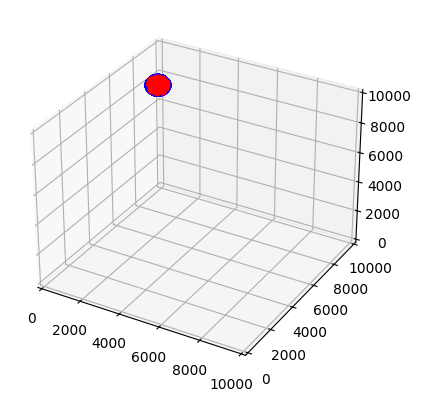

Volume calculated:  405066815.69278216
Box volume: 1000000000000
Theoretical:  0.0004050668156927822
Monte Carlo:  0.000403
accuracy:  0.9948975931557184


In [6]:
points = 1_000_000
point = Point_Maker.make_points(points, 0, 10_000)
x_point, y_point, z_point, point_in = point_in_spheres.point_in_spheres(sphere, point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(sphere)

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0, 10_000)
ax.set_ylim(0, 10_000)
ax.set_zlim(0, 10_000)

x, y, z = Plot_Sphere.plot_sphere(sphere)
ax.plot(x, y, z, '.b')
ax.plot(x_point, y_point, z_point, '.r')
plt.show()


Volume_of_box = 10_000 ** 3

theoretical = volum[0] / Volume_of_box
monte_carlo = point_in / points

print("Volume calculated: ",volum[0])
print("Box volume:",Volume_of_box)
print("Theoretical: ",theoretical)
print("Monte Carlo: ",monte_carlo)
print("accuracy: ", (monte_carlo/theoretical))




# Task 5. 
Time to calculate pi!

The volume of a sphere is calculated from
$$
Volume = \frac{4}{3}\pi r^3
$$
we can reverse this function to get:
$$
\pi = \frac{\text{volume}}{\left(\frac{4}{3}\right)r^3}
$$
The code corresponds to this function, also accounting for the fact that this function can take in multiple spheres and calculate pi from all of them.

In [7]:

print(calculate_pi.calculate_pi(sphere,point_in))

[3.1255629697321723]


# Task 6
In this task we use the same function as in task 2, except we specify to the function that we want 10 spheres.

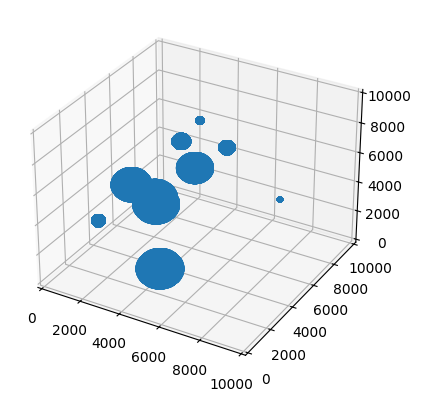

In [8]:

sphere= Random_Spheres.rand_tall_med_r(10,0,10000,10)
x,y,z =Plot_Sphere.plot_sphere(sphere)
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)
ax.plot(x,y,z,'.')
plt.show()


# Task 7
This function is explained in task 4, except that we are working with multiple spheres, which just means that the new volume of spheres is the volume of all spheres instead of a single sphere.

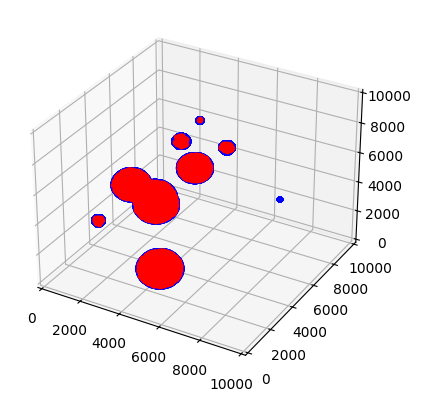

1.356117 % chance in theory
13541 / 1000000 = 1.3540999999999999 % chance through testing
Volume calculated : 1.3561173542999998
Points inside: 13541


In [9]:
points = 1000000
point = Point_Maker.make_points(points,0,10000)
x_point,y_point,z_point, point_in = point_in_spheres.point_in_spheres(sphere,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(sphere)


ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

x,y,z =Plot_Sphere.plot_sphere(sphere)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()

volume_total = 0
for i in range(len(sphere)):
    volume_total += round((volum[i]/(10000**3))*100, 10)
    
print(round((volume_total),6),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')
print(f"Volume calculated : {volume_total}")
print(f"Points inside: {point_in}")

# Task 8

The get dim and size of atom function reads the data from the dna_coords.txt and from it it reads the data. the values are stored in memory for the next task. Each atom has a size retrieved from the periodic table and is placed in its own corresponding list. We choose the size of the atoms to be in Å (angstroms)

In [10]:
H,O,P,C,N,DnA = Size_of_atom.Get_dim_and_size_of_atom()
print(DnA)

[[  1.2     -48.18074   1.74518  -1.22092]
 [  1.2     -47.81374   0.73518   2.32008]
 [  1.2     -48.08274  -0.93082   1.70608]
 ...
 [  1.55    -44.52374  -8.26082   0.66708]
 [  1.55    -44.65374  -8.12382   2.96508]
 [  1.55    -44.39374 -10.22182   2.02408]]


# Task 9
A function plotting the DnA from the txt file.

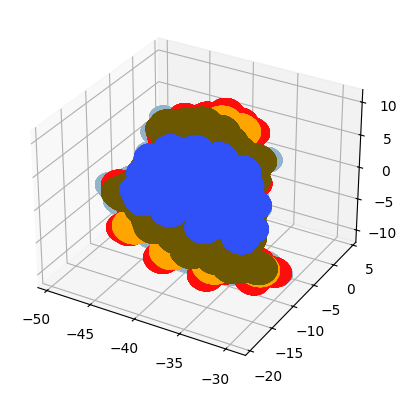

In [11]:
Plot_dna.Plot_dna(H,O,P,C,N)

# Task 10 
Here we calculate the volume of the DnA by checking with 10 000 points. and dividing this by the volume of the box to get the correct volume.
We can verify that this is correct by calculating the volume from the sizes of the atoms and their size in dna_coords.txt file in order to get the theoretical volume.

Out of most runs of the function our DnA volume comes out around 50% of the volume of the theoretical. This could be contributed to most points not hitting inside the spheres. 

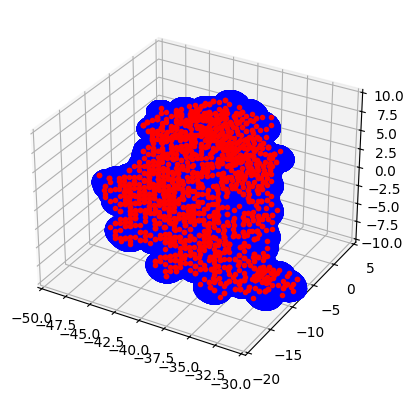

The theoretical size of the sphere is:  3672.276872539243
The tested volume is: 1694.0
Ratio:  0.4612941939828905
1694 / 10000 = 16.939999999999998 % through testing fell within the DNA structure.
Points inside:  1694


In [12]:
points = 10_000
point_x = Point_Maker.make_points(points,-50,-30)
point_y = Point_Maker.make_points(points,-20,5)
point_z = Point_Maker.make_points(points,-10,10)
point = np.array([point_x[:, 0], point_y[:, 0], point_z[:, 0]]).T
x_point,y_point,z_point, point_in = point_in_spheres.point_in_spheres(DnA,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(DnA)

ax = fig.add_subplot(projection="3d")
ax.set_xlim([-50, -30])
ax.set_ylim([-20, 5])
ax.set_zlim([-10, 10])
x,y,z =Plot_Sphere.plot_sphere(DnA)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()

Volume_of_box=20*25*20
inside_fraction=point_in / points
Volume_of_DnA= inside_fraction * Volume_of_box
spheres = Calculate_sphere.calculate_sphere()
Volume_theoretical = np.sum((4/3) * np.pi * spheres[:, 0]**3)

print("The theoretical size of the sphere is: ",Volume_theoretical)
print("The tested volume is:",Volume_of_DnA )
print("Ratio: ",Volume_of_DnA/Volume_theoretical)
print(point_in,'/',points,'=',(point_in/points)*100,'% through testing fell within the DNA structure.')

print("Points inside: ",point_in)

# ***Topic 2***

# Task 1 and 2

We made a function generating random 3d walks from random points in that 3d space. One can choose how many walks the function produces.

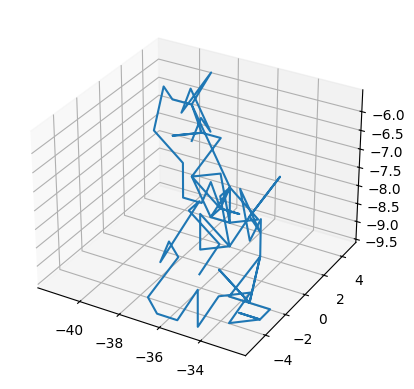

In [13]:
Random_walker.main()

# Task 3

### Strategy to Calculate the Accessible Volume of DNA

DNA is represented as a group of **spheres** (atoms). And as we have in all the previous task we will solve this by using the **Monte Carlo Method**

1. Generate many random walks inside a 3D box.  
2. Check how many of the points of the walks fall inside any of the DNA spheres using our previous in_sphere function.  
3. Calculate the fraction of points inside:  
   $$
   f = \frac{\text{points inside DNA}}{\text{total points}}
   $$
4. Multiply this fraction by the **box volume** to estimate the DNA volume:  
   $$
   V_{\text{DNA}} = f \cdot V_{\text{box}}
   $$


# Task 4

### Checking the Result
The strategy to check that **task 3** is correct is by dividing the volume of the box by the known value of the dna. If that corresponds to the share of the number of points within divided by the number of points outside the dna, then we know the volume is correct

- Increase the number of points — the estimate should stabilize.  
- Ensure the box fully contains the DNA structure.
- The theoretical and measured volumes should be close.  

$$
\text{Ratio} = \frac{V_{\text{Monte Carlo}}}{V_{\text{Theoretical}}}
$$

We calculate the theoretical volume by adding up all the spheres in the dna strand and since alot of them overlap then that means that the Random walk volume should be less. If the ratio is around **0.5–0.8**, then thats reasonable.



# Task 5

Here is the code for calculating the volume of DNA

Number of points inside DNA: 3440
Total points tested: 18412
Bounding box volume: 10000
Inside fraction:     0.186835
DNA volume ≈ 1868.3467303932218
Theoretical DNA volume: 3672.28
Ratio of theoretical volume vs Monte Carlo volume: 0.51


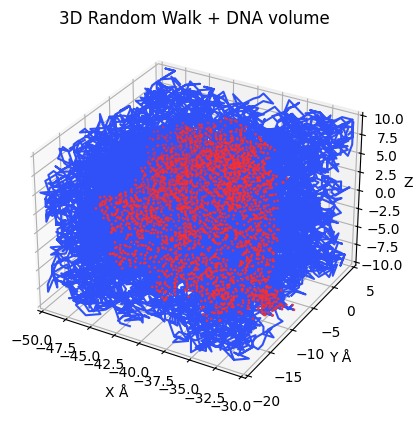

In [14]:
Calculate_the_volume_of_DNA.main()

Under you can see an image after 200 walks + 1000 steps. The scattered points really do resembel the dna strand!

![3D DNA Visualization](dnafigure.png)


# Interpretation of Result

From looking at the figure gotten out from the function we can allready see it resembles the dna strand in task 10. The walks are random so they results may vary. But the time we ran our function it estimated that **3,580 out of 18,342 points** landed inside the DNA structure. And about **19.5%** of the points were inside, giving an estimated **DNA volume of 1,951.8 Å** within a bounding box of **10,000 Å**.

Now the ratio we got out of the function was 
$$
\text{Ratio} = \frac{V_{\text{Monte Carlo}}}{V_{\text{Theoretical}}}
$$
$$
\text{0,53} = \frac{{\text{1.951.8}}}{{\text{3672.28}}}
$$

This means that the volume calculated by our random walk function was 53% of the total volume of all spheres. which is within the range we deemed reasonable.

The estimate stabilized with more walks and steps. This shows that the code is working correctly 

### Though there are a few things we learned and discussed:
Our method may be very ineffective at this. We are choosing to do random walks. But what its essentially doing is filling up a cube and checking where it hits the dna strand. Maybe its better if we just filled the whole cube up (kind of like a tub of water) and then checked. But we couldnt come up with that type of solution and the task didnt ask for it.

our method takes alot of walks and steps to get accurate. so its quite ineffcient.

We also saw that our code skipped a turn when it hits a limit. Meaning most walk hit the wall and then stopped and continued around the wall. So maybe this isnt uniformly random. We have used completely random directions but because of the skip it just continues along the wall untill it had finished all steps.


## *Statement on the use of Ai*

Audun: I did not use Ai for this lab

Markus: I did not use Ai for this lab

Kristoffer: I did not use Ai for this lab



# Individual contributions

Audun: I refactored some of topic 1 code into separate functions in separate files. I wrote the first draf in topic 1. I was helping with consultation on the code being written in topic 1. I also wrote the code behind the box and the initial code for the spheres.

Markus: I did most of the coding on topic 2 and debugged,rewrote code for topic 1. Wrote the final draft of the project and wrote topic 2. Made the figure for task 5. And put the whole project together. including tyding up code using pylint to get scores. 

Kristoffer: I made the first drafts of the codes in topic 1. discussed and helped with topic 2. 

In [15]:
from pylint import lint

files = [
    "calculate_pi.py",
    "Calculate_sphere.py",
    "Calculate_the_volume_of_DNA.py",
    "Plot_dna.py",
    "Plot_Sphere.py",
    "point_in_spheres.py",
    "Point_Maker.py",
    "Random_Spheres.py",
    "Random_walker.py",
    "Size_of_atom.py",
    "Volume_Of_Spheres.py",
]

user_input=int(input("skriv fra 0-10 for å sjekke filene i pylint: "))
lint.Run([files[user_input]])


--------------------------------------------------------------------
Your code has been rated at 10.00/10 (previous run: 10.00/10, +0.00)



SystemExit: 0

C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Bonus

The above function can be used to check all the functions pylint. it also shows you want was wrong with the file. All of them should be high scores. Only thing missing would be changing the file names to lower cases. The first one **calculate_pi.py** should be perfect.

We have used some asserts. You can see in **Size_of_atom.py** that we use it to check that the format is correct. 


# Refrences:

How to use pyling: https://pylint.pycqa.org/en/stable/user_guide/usage/run.html